# Decision Trees


# A non linearly separable dataset

In [36]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

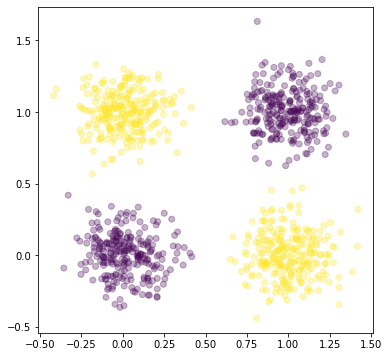

In [37]:
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# create a (quasi)random dataset
N_SAMPLES = 1000
N_CENTERS = 4
X, y = make_blobs(n_samples=N_SAMPLES, 
                  centers=[[0,0], [0,1], [1,0], [1,1]], 
                  cluster_std=0.15, random_state=4)
y[y==3]=0
y[y==2]=1

# plot
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.3);

## What's a decision tree

 - see see: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [38]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X,y)

DecisionTreeClassifier()

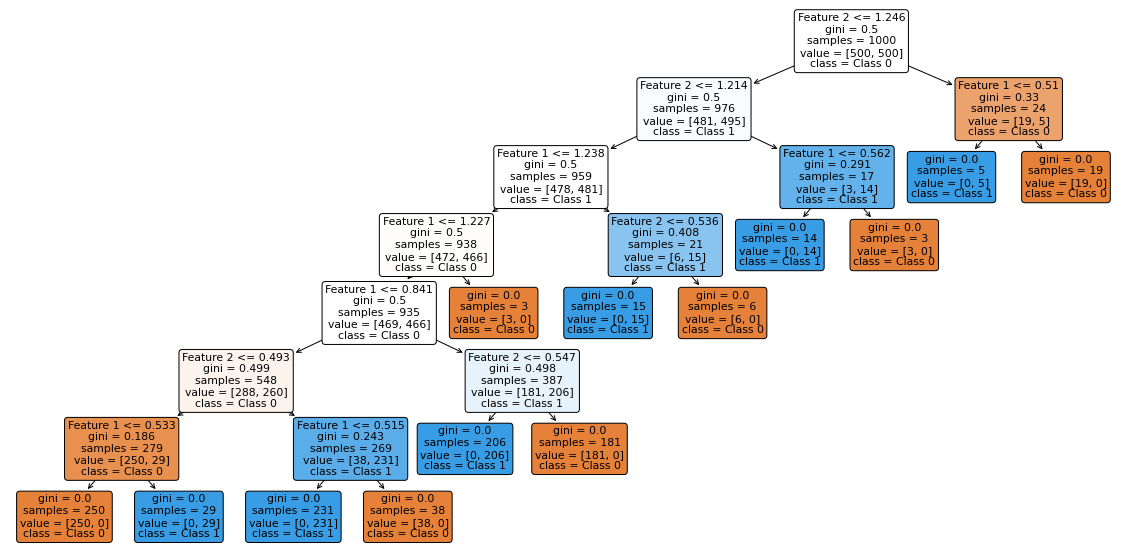

In [39]:
from sklearn.tree import plot_tree

f_names = ["Feature 1", "Feature 2"]
c_names = ["Class 0","Class 1"]

fig, ax = plt.subplots(figsize=(20,10))
plot_tree(model, ax=ax,
         feature_names=f_names, class_names=c_names,  
                                filled=True, rounded=True);

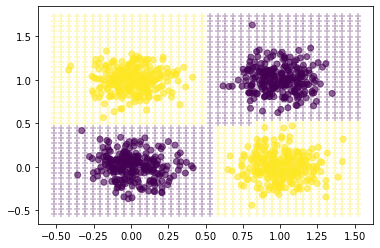

In [40]:
def model_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    zz = [ [xx,yy] for xx in np.linspace(x_min, x_max, 40) 
                   for yy in np.linspace(y_min, y_max, 40) ]
    zz = np.array(zz)
    z_labels = model.predict(zz)

    plt.figure()
    plt.scatter(zz[:,0], zz[:,1], c=z_labels, marker='+', alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, alpha=0.6)

model_decision_boundary(model, X, y)

# Wine dataset

Url: http://archive.ics.uci.edu/ml/datasets/Wine?ref=datanews.io


These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. 


The attributes are:
1. Quality (1-3)
1. Alcohol 
1. Malic acid 
1. Ash 
1. Alcalinity of ash 
1. Magnesium 
1. Total phenols 
1. Flavanoids 
1. Nonflavanoid phenols 
1. Proanthocyanins 
1. Color intensity 
1. Hue 
1. OD280/OD315 of diluted wines 
1. Proline 


In [41]:
import numpy as np
import pandas as pd

data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
df = pd.read_csv(data_url, header=None)

In [42]:
# data preparation
# convert to float to have precise and homogenoues computation
dataset = df.astype(float)
print("dataset shape", dataset.shape)

# get features by removing id and class
# remove id
X = dataset.loc[:,1:]
print("X shape", X.shape)

# get class label
y = dataset.loc[:,0]
print("y shape", y.shape)

dataset shape (178, 14)
X shape (178, 13)
y shape (178,)


## Let's build a  tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X,y)

DecisionTreeClassifier()

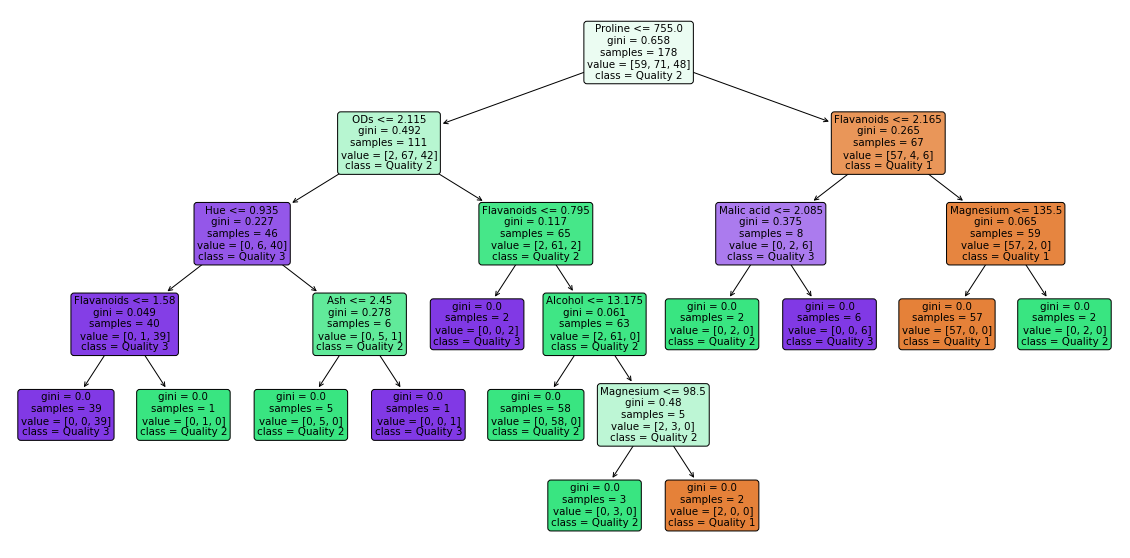

In [44]:
from sklearn.tree import plot_tree

f_names = ["Alcohol","Malic acid", "Ash", "Alcalinity", "Magnesium", "Phenols",
            "Flavanoids", "Nonflavanoid", "Proanthocyanins", "Color", "Hue", "ODs", "Proline"]

c_names = ["Quality 1","Quality 2","Quality 3"]

fig, ax = plt.subplots(figsize=(20,10))
plot_tree(model, ax=ax,
         feature_names=f_names, class_names=c_names,  
                                filled=True, rounded=True);

## Decision Trees

- Recursive Algorithm
- Select the best split and partition the dataset
- Partitioning Scenarios: **k-ary tree, binary tree, categorical, ordinal, numerical**
- Recursion ends when a node is pure or no further splitting is possible
  - other constraints can be enforced

## Let's focus on *binary* decision tree for *classification*

## Algorithm Sketch


<div class="alert alert-info">

**BuildTree**(${\cal D}$):

1. *BestSplit*, *BestGain* = *None*
1. **For each** feature $f$
1. $\quad$ **For each** threshold $t$
1. $\quad\quad$ *Gain* $\gets$ goodness of the split $(f \leq t)$
1. $\quad\quad$ **If** Gain>=BestGain:
1. $\quad\quad\quad$ *BestGain* $\gets$ *Gain*
1. $\quad\quad\quad$ BestSplit* $\gets$ $(f \leq t)$
1. **If** *BestGain*$=0$ or *other stopping criterion is met*:
1. $\quad$ $\mu \gets$ the best prediction for ${\cal D}$
1. $\quad$ **Return** $Leaf(\mu)$
1. Let $f$ and $t$ be those of BestSplit = $(f \leq t)$
1. ${\cal D}_L \gets \{x \in {\cal D} ~|~ x_f\leq t\}$ *(Left Partition)*
1. $L \gets$  **BuildTree**(${\cal D}_L$) *(Left Child)*
1. ${\cal D}_R \gets \{x \in {\cal D} ~|~ x_f > t\}$ *(Right Partition)*
1. $R \gets$  **BuildTree**(${\cal D}_R$) *(Right Child)*
1. **Return** $Node(L,R)$
</div>


It is a greedy algorithm (without backtracking, i.e., decisions are not changed) that maximizes the Gain at every step.

## Driving Factor

We let the design of our algorithm be driven by the quality measure adopted.

For classification, we adopt **error** $E$, that is the fraction of misclassified instances.

## Leaf Node

- Given a dataset ${\cal D}$ what is the best prediction we can have?

$$\mu = \arg\min\limits_{\mu} Error({\cal D}, \mu)= \arg\min\limits_{\mu} \frac{1}{|{\cal D}|} \sum\limits_{(x,y) \in {\cal D}} E(y, \mu)$$
   - where $ E(y, \mu)$ is 0 if $\mu=y$ and 1 otherwise

- for the classification task, it holds that $\mu$ must be the most frequent label in ${\cal D}$

- if we denote with $p_i$ the frequency of label $l_i$ in ${\cal D}$, we can write that total error 
on the dataset is:
$$
Error({\cal D}) = 1 - \max_i p_i
$$
  - Maximum: $(1 - 1/m)$, where $m$ is the number of classes, when records are equally distributed among all classes, implying least interesting information
  - Minimum: (0.0) when all records belong to one class, implying most interesting information (*pure leaf*)

- Hereinafter we denote with $Error({\cal D})$ the error of the best prediction $\mu$ for dataset ${\cal D}$.


## Internal Node

- Given the pair $f \leq t$, we must determine the quality of this split.

- In general, assuming $Error$ is an average measure, we denote the gain of a split as the error reduction with respect to not splitting the node.

$$
Gain(f,t~|~{\cal D}) = Error({\cal D}) - \left(\frac{|{\cal D}_L|}{|{\cal D}|} Error({\cal D}_L) + \frac{|{\cal D}_R|}{|{\cal D}|} Error({\cal D}_R) \right)
$$

- We would like Gain>0, note that Gain cannot decrease.


## Let's make an example

| ${\cal D}$ | |
|-|-|
|Class 0 | Class 1 |
| 400    |  400    |

| Splitting A | &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;| &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;| &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;| vs. | Splitting B | &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;| &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;| &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|
|-|-|-|-|-|-|-|-|-|
| ${\cal D}_L$ | | ${\cal D}_R$ | |     | ${\cal D}_L$ | | ${\cal D}_R$ | |
|Class 0 |  Class 1 |Class 0 | Class 1 | |Class 0 | Class 1 |Class 0 | Class 1 |
| 300    |  100    | 100    |  300    | | 200    |  400    | 200    |  0    |
| $p_0=3/4$ | ${p_1=1/4}$ | $p_0=1/4$ | $p_1=3/4$ | | $p_0= 1/3$ | $p_1= 2/3$ | $p_0= 1$ | $p_1= 0$ |




- Suppose $|{\cal D}|$ has 400 instances in class 0 and 400 instances in class 1, denoted with ${\cal D}=(400,400)$
   - $Error({\cal D}) = 0.5$
   

- Suppose Splitting $A=(f_1, t_1)$ produces ${\cal D}_L=(300,100)$ and ${\cal D}_R=(100,300)$:
   - $Gain(A|~{\cal D}) = 0.5 - 400/800 * (1- 3/4) - 400/800 *(1-3/4) = 0.25$
   
   
- Suppose Splitting $B=(f_2, t_2)$ produces ${\cal D}_L=(200,400)$ and ${\cal D}_R=(200,000)$:
   - $Gain(B|~{\cal D}) = 0.5 - 600/800 * (1- 2/3) - 200/800 *(1-1) = 0.25$
   
   
- The two splits are equally good, one of them is picked at random



- Indeed, we would like to consistently prefer $B$ as it produces one *pure* child, i.e., a set of instances with perfect prediction that needs not to be processed recursively.

## Information Gain
### ( ID3 - Iterative Dichotomiser )


The error of a dataset is measured as the entropy of its labels distributions

$$
Error({\cal D}) = Info({\cal D}) = -\sum\limits_i p_i\log_2 ( p_i )
$$
   - where $p_i$ is the probability/frequency of label $i$
   - This is indeed the **entropy**, i.e., a measure of the randomness of the labels
   - Maximum: $\log m$, where $m$ is the number of classes, when records are equally distributed among all classes implying least information
   - Minimum: 0.0 when all records belong to one class, implying most information (assume $0\log 0=0$)



## Let's make an example

- Suppose $|{\cal D}|$ has 400 instances in class 0 and 400 instances in class 1, denote with ${\cal D}=(400,400)$
   - $Error({\cal D}) = - 1/2 \log(1/2) - 1/2 \log(1/2) = \log(2) = 1$
   

- Suppose Splitting $A=(f_1, t_1)$ produces ${\cal D}_L=(300,100)$ and ${\cal D}_R=(100,300)$:
   - $Gain(A|~{\cal D}) = 1 - 400/800 * ( - 3/4 \log(3/4) - 1/4 \log(1/4)) - 400/800 *( - 1/4 \log(1/4) - 3/4 \log(3/4)) \approx 0.19$
   
   
- Suppose Splitting $B=(f_2, t_2)$ produces ${\cal D}_L=(200,400)$ and ${\cal D}_R=(200,000)$:
   - $Gain(B|~{\cal D}) = 1 - 600/800 * (- 1/3 \log(1/3) -2/3 \log(2/3)) - 200/800 *(- 1 \log(1) -0 \log(0)) \approx 0.31$
   
   
- Largest Gain is for split B!

## Gain Ratio

### ( C4.5 Algorithm )

- For k-ary decision trees (instead of binary), Information Gain favors splits with several small partitions
  - they are more likely to be pure
  

- Gain Ration normalizes the Information Gain by the SplitInfo of a k-way splitting:
$$
SplitInfo({\cal D}) =  -\sum\limits_{i=1}^k \frac{|{\cal D}_i|}{|{\cal D}|} \log \left(\frac{|{\cal D}_i|}{|{\cal D}|}\right) 
$$
  - this is analogous to the information gain, but related to the partitioning instead of the labels
  - large values of $k$ (complex partitionings) receive a large score
  
  
  
- The Gain Ratio is formalized as:
$$
Error({\cal D}) = GainRatio({\cal D}) = \frac{Info({\cal D})}{SplitInfo({\cal D})}
$$

## GINI Index

### ( CART - Classification and Regression Trees)

GINI is a measure of statistical dispersion developed by the Italian statistician and sociologist Corrado Gini (the index was published in 1912).

$$
Error({\cal D}) = Gini({\cal D}) = 1-\sum\limits_i p_i^2
$$

  - Maximum: $(1 - 1/m)$ when records are equally distributed among all classes, implying least interesting information
  - Minimum: (0.0) when all records belong to one class, implying most interesting information

## Let's make an example

- Suppose $|{\cal D}|$ has 400 instances in class 0 and 400 instances in class 1, denote with ${\cal D}=(400,400)$
   - $Error({\cal D}) = 1 - (1/2)^2 - (1/2)^2 = 0.5$
   

- Suppose Splitting $A=(f_1, t_1)$ produces ${\cal D}_L=(300,100)$ and ${\cal D}_R=(100,300)$:
   - $Gain(A|~{\cal D}) = 0.5 - 400/800 * ( 1 - (3/4)^2 - (1/4)^2) - 400/800 *(1- (1/4)^2 - (3/4)^2) = 0.125$
   
   
- Suppose Splitting $B=(f_2, t_2)$ produces ${\cal D}_L=(200,400)$ and ${\cal D}_R=(200,000)$:
   - $Gain(B|~{\cal D}) =  0.5 - 600/800 * ( 1 - (1/3)^2 - (2/3)^2) - 200/800 *(1- (1)^2 - (0)^2) \approx 0.167$
   
   
- Largest Gain is for split B!

## Exercise: Compare gini vs. information gain on a train/test split



See documentation for the `criterion` parameter:
  - https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

# Decision tree on multiple classes

Try a different number of clusters and leaves

Train Accuracy: 0.999 - Test Accuracy: 0.991


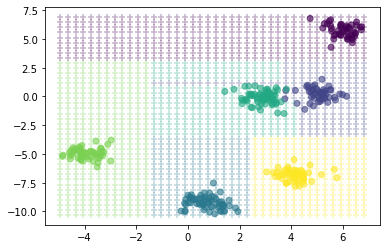

In [45]:
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# create a (quasi)random dataset
N_SAMPLES = 1000
N_CENTERS = 6
X, y = make_blobs(n_samples=N_SAMPLES, 
                  centers=N_CENTERS, 
                  cluster_std=0.5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# train and predict
dt = DecisionTreeClassifier(max_leaf_nodes=12) # change this!
dt.fit(X_train,y_train)

# compute Accuracy
train_acc = accuracy_score(y_true = y_train, y_pred = dt.predict(X_train))
test_acc  = accuracy_score(y_true = y_test,  y_pred = dt.predict(X_test))
print ("Train Accuracy: {:.3f} - Test Accuracy: {:.3f}".format(train_acc,test_acc) )

model_decision_boundary(dt, X_test, y_test)

## Stopping Criteria: max leaf nodes

The number of leaves affects the model expressiveness.

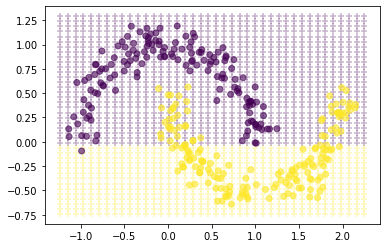

In [46]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X, y = make_moons(n_samples=1000, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# train and predict
dt = DecisionTreeClassifier(max_leaf_nodes=2) # change this!
dt.fit(X_train,y_train)

model_decision_boundary(dt, X_test, y_test)


In [47]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X, y = make_moons(n_samples=1000, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

for max_leaves in range(2,50):
    # train and predict
    dt = DecisionTreeClassifier(max_leaf_nodes=max_leaves)
    dt.fit(X_train,y_train)

    # compute Accuracy
    train_acc = accuracy_score(y_true = y_train, y_pred = dt.predict(X_train))
    test_acc  = accuracy_score(y_true = y_test,  y_pred = dt.predict(X_test))
    print ("Train Accuracy: {:.3f} - Test Accuracy: {:.3f}".format(train_acc,test_acc) )

Train Accuracy: 0.836 - Test Accuracy: 0.836
Train Accuracy: 0.891 - Test Accuracy: 0.906
Train Accuracy: 0.910 - Test Accuracy: 0.927
Train Accuracy: 0.910 - Test Accuracy: 0.927
Train Accuracy: 0.910 - Test Accuracy: 0.927
Train Accuracy: 0.972 - Test Accuracy: 0.982
Train Accuracy: 0.972 - Test Accuracy: 0.982
Train Accuracy: 0.972 - Test Accuracy: 0.982
Train Accuracy: 0.994 - Test Accuracy: 0.994
Train Accuracy: 0.994 - Test Accuracy: 0.994
Train Accuracy: 0.996 - Test Accuracy: 0.985
Train Accuracy: 0.997 - Test Accuracy: 0.991
Train Accuracy: 0.997 - Test Accuracy: 0.991
Train Accuracy: 0.999 - Test Accuracy: 0.982
Train Accuracy: 0.999 - Test Accuracy: 0.982
Train Accuracy: 1.000 - Test Accuracy: 0.982
Train Accuracy: 1.000 - Test Accuracy: 0.982
Train Accuracy: 1.000 - Test Accuracy: 0.982
Train Accuracy: 1.000 - Test Accuracy: 0.982
Train Accuracy: 1.000 - Test Accuracy: 0.982
Train Accuracy: 1.000 - Test Accuracy: 0.982
Train Accuracy: 1.000 - Test Accuracy: 0.982
Train Accu

## Stopping Criteria: maximum depth

The number of leaves affects the model expressiveness.

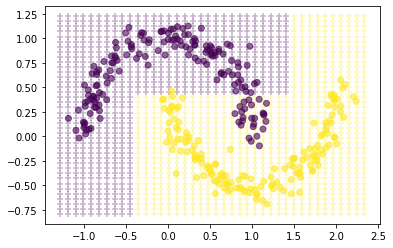

In [48]:
from sklearn import tree
from sklearn.metrics import accuracy_score

X, y = make_moons(n_samples=1000, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# train and predict
dt = tree.DecisionTreeClassifier(max_depth=2) # change this!
dt.fit(X_train,y_train)

model_decision_boundary(dt, X_test, y_test)

In [49]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

X, y = make_moons(n_samples=1000, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

for max_depth in range(1,20):
    # train and predict
    dt = tree.DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train,y_train)

    # compute Accuracy
    train_acc = accuracy_score(y_true = y_train, y_pred = dt.predict(X_train))
    test_acc  = accuracy_score(y_true = y_test,  y_pred = dt.predict(X_test))
    print ("Train Accuracy: {:.3f} - Test Accuracy: {:.3f}".format(train_acc,test_acc) )

Train Accuracy: 0.843 - Test Accuracy: 0.827
Train Accuracy: 0.919 - Test Accuracy: 0.909
Train Accuracy: 0.919 - Test Accuracy: 0.909
Train Accuracy: 0.919 - Test Accuracy: 0.909
Train Accuracy: 0.999 - Test Accuracy: 0.994
Train Accuracy: 0.999 - Test Accuracy: 0.994
Train Accuracy: 1.000 - Test Accuracy: 0.991
Train Accuracy: 1.000 - Test Accuracy: 0.991
Train Accuracy: 1.000 - Test Accuracy: 0.991
Train Accuracy: 1.000 - Test Accuracy: 0.991
Train Accuracy: 1.000 - Test Accuracy: 0.991
Train Accuracy: 1.000 - Test Accuracy: 0.991
Train Accuracy: 1.000 - Test Accuracy: 0.991
Train Accuracy: 1.000 - Test Accuracy: 0.991
Train Accuracy: 1.000 - Test Accuracy: 0.991
Train Accuracy: 1.000 - Test Accuracy: 0.991
Train Accuracy: 1.000 - Test Accuracy: 0.991
Train Accuracy: 1.000 - Test Accuracy: 0.991
Train Accuracy: 1.000 - Test Accuracy: 0.991


## Tuning of the tree

The power of the tree can be tuned with the following constraints:

- **max_depth**: The maximum depth of the tree. 

- **min_samples_split**: The minimum number of samples required to split an internal node

- **min_samples_leaf**: The minimum number of samples required to be at a leaf node.

- **max_leaf_nodes**: The maximum number of trees.

- **min_impurity_decrease**: The minimum gain for allowing a split.

- **min_impurity_split**: The minim error for allowing a split.

In conjunction with the above constraints most implementations implement a smarter growing strategy. 
Indeed, if we are limited in the number of nodes, then growing order makes a difference.
In this case, it is useful to evaluate the gain provided by splitting all of the tree leaves, and 
then split the leaf the provides the maximum gain.

## Algorithm Sketch 

Non-recursive, best split first

<div class="alert alert-info">
    
BuildTree(${\cal D}$):
1. $Tree \gets \emptyset$
1. $(f \leq t) \gets $  best split of ${\cal D}$
1. *Gain* $\gets$ goodness of the split $(f \leq t)$
1. $Queue \gets \langle gain,(f\leq t),{\cal D}\rangle$
1. **While** $Queue \neq \emptyset$ and *no other stopping criterion is met*:
1. $\quad$ $\langle gain, (f \leq t), {\cal D}^*\rangle \gets Queue$.pop_max()
1. $\quad$ Add node $(f \leq t)$ to $Tree$ at the leaf corresponding to ${\cal D}^*$
1. $\quad$ *(Left Partition)* 
1. $\quad$ ${\cal D}_L \gets \{x \in {\cal D} ~|~ x_f\leq t\}$ 
1. $\quad$ $(f \leq t) \gets $  best split of ${\cal D}_L$
1. $\quad$ *Gain* $\gets$ goodness of the split $(f \leq t)$
1. $\quad$ $Queue$.push( $\langle gain,(f\leq t),{\cal D}_L\rangle$ )
1. $\quad$ *(Right Partition)* 
1. $\quad$ ${\cal D}_R \gets \{x \in {\cal D} ~|~ x_f> t\}$ 
1. $\quad$ $(f \leq t) \gets $  best split of ${\cal D}_R$
1. $\quad$ *Gain* $\gets$ goodness of the split $(f \leq t)$
1. $\quad$ $Queue$.push( $\langle gain,(f\leq t),{\cal D}_R\rangle$ )
1. **Return** $Tree$

</div>

## Regression


- Decision trees can be used also for regression problems.


- We must use the proper quality/cost function.


- For regression, the cost function is Mean Squared Error(MSE):

$$
Error(tree, {\cal D}) = MSE(tree, {\cal D}) =  \frac{1}{|{\cal D}|} \sum\limits_{(x,y)\in {\cal D}} (tree(x)- y)^2
$$


## Leaf Node

- Given a dataset ${\cal D}$ what is the best prediction we can have?

- $\mu = \arg\min MSE(\mu, {\cal D})\quad \Rightarrow\quad \mu =  \frac{1}{|{\cal D}|} \sum\limits_{(x,y)\in {\cal D}} y$

- for the regression task, it holds that $\mu$ must be the average value of the labels in ${\cal D}$

- Given $\mu$, we can write that total error on the dataset is:
$$
Error({\cal D}) =  \frac{1}{|{\cal D}|} \sum\limits_{(x,y)\in {\cal D}} (\mu - y)^2
$$

- Hereinafter we denote with $Error({\cal D})$ the error of the best prediction for dataset ${\cal D}$.


## Internal Node

- Given the pair $f \leq t$, we must determine the quality of this split.

- In general, assuming $Error$ is an average measure, we denote the gain of a split as the error reduction w.r.t. to not splitting the node.

$$
Gain(f,t~|~{\cal D}) = Error({\cal D}) - \frac{|{\cal D}_L|}{|{\cal D}|} Error({\cal D}_L) - \frac{|{\cal D}_R|}{|{\cal D}|} Error({\cal D}_R)
$$

- We would like Gain>0, note that Gain cannot decrease.


## Regression Problem

In [50]:
from sklearn.datasets import load_boston
data = load_boston()

/home/stefano/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dat

In [51]:
print (data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [52]:
X = data.data
y = data.target

print (X.shape)
print (y.shape)
print (data.feature_names)

(506, 13)
(506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


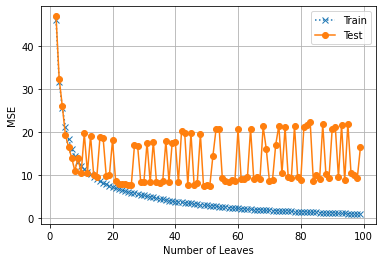

In [53]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

errors = []

for max_leaves in range(2,100):
    # train and predict
    dt = DecisionTreeRegressor(max_leaf_nodes=max_leaves)
    dt.fit(X_train,y_train)

    # compute Accuracy
    train_acc = mean_squared_error(y_true=y_train, y_pred=dt.predict(X_train))
    test_acc  = mean_squared_error(y_true=y_test,  y_pred=dt.predict(X_test))

    errors += [ [max_leaves, train_acc, test_acc] ]

errors = np.array(errors)

fig, ax = plt.subplots()
ax.plot(errors[:,0], errors[:,1], "x:", label="Train")
ax.plot(errors[:,0], errors[:,2], "o-", label="Test")
ax.set_ylabel("MSE")
ax.set_xlabel("Number of Leaves")
ax.grid()
ax.legend();


In [54]:
# Train a linear regression

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

reg_train_err = mean_squared_error(y_true=y_train, y_pred=reg.predict(X_train))
reg_test_err  = mean_squared_error(y_true=y_test,  y_pred=reg.predict(X_test))


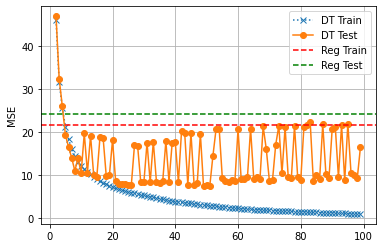

In [55]:
# Comparison plot

fig, ax = plt.subplots()
ax.plot(errors[:,0], errors[:,1], "x:", label="DT Train")
ax.plot(errors[:,0], errors[:,2], "o-", label="DT Test")
ax.axhline(y=reg_train_err, c='red', ls="--", label="Reg Train")
ax.axhline(y=reg_test_err, c='green', ls="--", label="Reg Test")
ax.set_ylabel("MSE")
ax.grid()
ax.legend();

## Model Overfitting

Breast_Cancer dataset: https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset

In [56]:
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)

In [57]:
X.shape, y.shape

((569, 30), (569,))

In [58]:
import numpy as np
uniq_vals, counts = np.unique(y, return_counts=True)
uniq_vals, counts

(array([0, 1]), array([212, 357]))

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

for max_leaves in range(2,20):
    # train and predict
    dt = DecisionTreeClassifier(max_leaf_nodes=max_leaves)
    dt.fit(X_train,y_train)

    # compute Accuracy
    train_acc = accuracy_score(y_true = y_train, y_pred = dt.predict(X_train))
    test_acc  = accuracy_score(y_true = y_test,  y_pred = dt.predict(X_test))
    print ( f"Num. Leaves {max_leaves:2d} - "
            f"Train Accuracy: {train_acc:.3f} - Test Accuracy: {test_acc:.3f}" )

Num. Leaves  2 - Train Accuracy: 0.923 - Test Accuracy: 0.881
Num. Leaves  3 - Train Accuracy: 0.932 - Test Accuracy: 0.916
Num. Leaves  4 - Train Accuracy: 0.955 - Test Accuracy: 0.916
Num. Leaves  5 - Train Accuracy: 0.965 - Test Accuracy: 0.923
Num. Leaves  6 - Train Accuracy: 0.972 - Test Accuracy: 0.930
Num. Leaves  7 - Train Accuracy: 0.977 - Test Accuracy: 0.958
Num. Leaves  8 - Train Accuracy: 0.979 - Test Accuracy: 0.923
Num. Leaves  9 - Train Accuracy: 0.984 - Test Accuracy: 0.909
Num. Leaves 10 - Train Accuracy: 0.988 - Test Accuracy: 0.937
Num. Leaves 11 - Train Accuracy: 0.991 - Test Accuracy: 0.902
Num. Leaves 12 - Train Accuracy: 0.993 - Test Accuracy: 0.930
Num. Leaves 13 - Train Accuracy: 0.993 - Test Accuracy: 0.881
Num. Leaves 14 - Train Accuracy: 0.998 - Test Accuracy: 0.888
Num. Leaves 15 - Train Accuracy: 0.998 - Test Accuracy: 0.895
Num. Leaves 16 - Train Accuracy: 1.000 - Test Accuracy: 0.881
Num. Leaves 17 - Train Accuracy: 1.000 - Test Accuracy: 0.874
Num. Lea

### Reasons for model overfitting

 1. Low data quality
    - presence of noise
    - lack of representative samples
 2. High model complexity
    - multiple comparison procedure


### Multiple comparison procedure

Consider the task of predicting whether stock market will rise/fall in the next 10 trading days 

Assume that with random guessing: 
$$P(correct) = 0.5$$
 
Make 10 random guesses in a row:
$$P(\#correct \geq 8 ) = \frac{{10 \choose 8} + {10 \choose 9} + {10 \choose 10}}{2^{10}} \approx 0.05$$

Approach:
 - take 50 analysts
 - each makes 10 random guesses
 - select the most accurate analyst

Probability that at least one analyst makes 8 or more correct predictions:
$$P(\#correct \geq 8 ) = 1-(1-0.05)^{50} \approx 0.94$$

Most algorithms perform training steps (e.g., adding a node to a tree) by selecting the among several alternatives (e.g., feature-threshold pairs). The performance we see might be due to random guessing.

Random guessing is not going to work on the test set!





### Model Selection

How to choose among different models?

 - Estimate the error on the test set (generalization error)
 - using the error on the training set is an optimistic measure
 - wait for it

**Intuition: the model does not need to be overly complex**.

**Occam's Razor**: Given two models with the same generalization errors, the simpler model is preferred over the more complex model.

**Pre-pruning vs. post-pruning** methods:
 - pre-pruning: early stopping criteria (we have already seen a few)
 - post-pruning: grow completely then prune sub-trees

Post allows to take decision by "analyzing a larger pool of nodes".

**Intuition: include the model complexity in the cost being optimized**.

The error of a model ${\cal M}$ (e.g., a decision tree) is:

$$Error({\cal D}, {\cal M})= \frac{1}{|{\cal D}|} \sum\limits_{(x,y) \in {\cal D}} E(y, {\cal M}(x))$$

The generalization error can be estimated as:

$$ Error_{gen}({\cal D}, {\cal M}) = Error({\cal D}, {\cal M}) + \alpha\cdot Complexity ({\cal M})$$




One common implementation is to measure the model complexity as the number of leaf nodes divided by the size of ${\cal D}$.

$$ Error_{gen}({\cal D}, {\cal M}) = Error({\cal D}, {\cal M}) + \alpha\cdot \frac{\#leaves\ in\ |{\cal M}|}{|{\cal D}|}$$

With $\alpha=1$ this means that adding a leaf costs $1/|{\cal D}|$ 
 - adding a leaf is not convenient if $Error({\cal D}, {\cal M})$ is not reduced ($Error_{gen}$ increases)
 - adding a leaf is not convenient if $Error({\cal D}, {\cal M})$ is reduced by one instance ($Error_{gen}$ does not change)
 - adding a leaf is convenient if $Error({\cal D}, {\cal M})$ is reduced by more than one instance ($Error_{gen}$ decreases)

### Scikit-learn implementation (Breiman at. al)

see https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html

$$ Error_{gen}({\cal D}, T) = Error({\cal D}, T) + \alpha\cdot |L|$$

 - where $T$ is a decision tree, and $|L|$ is the number of leaves it includes.

**Algorithm**:
 - grow a full/large tree.
 - iteratively replace the less useful subtree with a leaf node.

If $t$ is a subtree of $T$, in general it holds that:
$$ Error({\cal D}_{|t}, t)\ \geq\ \sum_{l \in L} Error({\cal D}_{|l}, l)$$

 - ${\cal D}_{|t}$ and ${\cal D}_{|l}$ denote the instances falling into $t$ or $l$.

**Example**: if they are equal, it means that the sub-tree $t$ adds complexity to the model without reducing the error on the training set. Therefore we should remove $t$!

We call effective alpha $\alpha_{eff}(t)$ of a subtree $t$ the value of $\alpha$ such that the two error above are equal:

$$ Error_{gen}({\cal D}_{|t}, t)\ =\sum_{l \in L} Error_{gen}({\cal D}_{|l}, l)$$

**Algorithm**:
 - grow a full/large tree.
 - sort subtrees by increasing $\alpha_{eff}(t)$. A subtree $t$ for which $\alpha_{eff}(t)=0$ falls into the example above.
 - prune all sub-trees $t$ for which $\alpha_{eff}(t)$ is smaller than a user defined threshold.


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

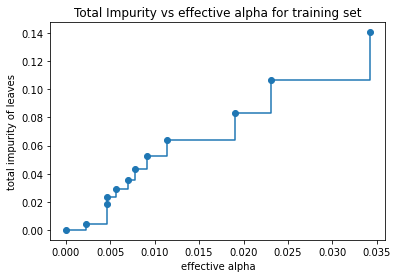

In [60]:
dt = DecisionTreeClassifier(random_state=0)
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [61]:
# materialize all possible trees
ccp_alphas = ccp_alphas[:-1]
dts = []
for ccp_alpha in ccp_alphas:
    dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    dt.fit(X_train, y_train)
    dts.append(dt)

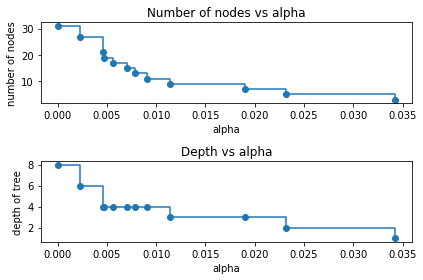

In [62]:
node_counts = [dt.tree_.node_count for dt in dts]
depth = [dt.tree_.max_depth for dt in dts]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

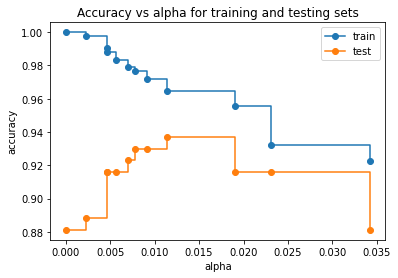

In [63]:
train_scores = [dt.score(X_train, y_train) for dt in dts]
test_scores = [dt.score(X_test, y_test) for dt in dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

## Decision Trees Implementation

## Algorithm Sketch 

Non-recursive, best split first

<div class="alert alert-info">
    
BuildTree(${\cal D}$):
1. $Tree \gets \emptyset$
1. $(f \leq t) \gets $  best split of ${\cal D}$
1. *Gain* $\gets$ goodness of the split $(f \leq t)$
1. $Queue \gets \langle gain,(f\leq t),{\cal D}\rangle$
1. **While** $Queue \neq \emptyset$ and *no other stopping criterion is met*:
1. $\quad$ $\langle gain, (f \leq t), {\cal D}^*\rangle \gets Queue$.pop_max()
1. $\quad$ Add node $(f \leq t)$ to $Tree$ at the leaf corresponding to ${\cal D}^*$
1. $\quad$ *(Left Partition)* 
1. $\quad$ ${\cal D}_L \gets \{x \in {\cal D} ~|~ x_f\leq t\}$ 
1. $\quad$ $(f \leq t) \gets $  best split of ${\cal D}_L$
1. $\quad$ *Gain* $\gets$ goodness of the split $(f \leq t)$
1. $\quad$ $Queue$.push( $\langle gain,(f\leq t),{\cal D}_L\rangle$ )
1. $\quad$ *(Right Partition)* 
1. $\quad$ ${\cal D}_R \gets \{x \in {\cal D} ~|~ x_f> t\}$ 
1. $\quad$ $(f \leq t) \gets $  best split of ${\cal D}_R$
1. $\quad$ *Gain* $\gets$ goodness of the split $(f \leq t)$
1. $\quad$ $Queue$.push( $\langle gain,(f\leq t),{\cal D}_R\rangle$ )
1. **Return** $Tree$

</div>


See for instance https://github.com/microsoft/LightGBM, https://github.com/dmlc/xgboost, https://github.com/catboost/catboost.

## Driving Factor

We let the design of our algorithm be driven by the quality measure adopted.

For classification, we can adopt **error** $E$, that is the fraction of misclassified instances.

## Regression


- Decision trees can be used also for regression problems.


- We must use the proper quality/cost function.


- For regression, the cost function is Mean Squared Error(MSE):

$$
Error(tree, {\cal D}) = MSE(tree, {\cal D}) =  \frac{1}{|{\cal D}|} \sum\limits_{(x,y)\in {\cal D}} (tree(x)- y)^2
$$


## Leaf Node

- Given a dataset ${\cal D}$ what is the best prediction we can have?

- $\mu = \arg\min MSE(\mu, {\cal D})\quad \Rightarrow\quad \mu =  \frac{1}{|{\cal D}|} \sum\limits_{(x,y)\in {\cal D}} y$

- for the regression task, it holds that $\mu$ must be the average value of the labels in ${\cal D}$

- Given $\mu$, we can write that total error on the dataset is:
$$
Error({\cal D}) =  \frac{1}{|{\cal D}|} \sum\limits_{(x,y)\in {\cal D}} (\mu - y)^2
$$

- Hereinafter we denote with $Error({\cal D})$ the error of the best prediction for dataset ${\cal D}$.


## Internal Node

- Given the pair $f \leq t$, we must determine the quality of this split.

- In general, assuming $Error$ is an average measure, we denote the gain of a split as the error reduction w.r.t. to not splitting the node.

$$
Gain(f,t~|~{\cal D}) = Error({\cal D}) - \frac{|{\cal D}_L|}{|{\cal D}|} Error({\cal D}_L) - \frac{|{\cal D}_R|}{|{\cal D}|} Error({\cal D}_R)
$$

- We would like Gain>0, note that Gain cannot decrease.


$$
Gain(f,t~|~{\cal D}) =
     \frac{1}{|{\cal D}|} \sum\limits_{(x,y)\in {\cal D}} (\mu - y)^2 - 
     \frac{|{\cal D}_L|}{|{\cal D}|} \frac{1}{|{\cal D}_L|} \sum\limits_{(x,y)\in {\cal D}_L} (\mu_L - y)^2  - 
     \frac{|{\cal D}_R|}{|{\cal D}|} \frac{1}{|{\cal D}_R|} \sum\limits_{(x,y)\in {\cal D}_R} (\mu_R - y)^2  
$$

simplify 

$$
Gain(f,t~|~{\cal D}) = \frac{1}{|{\cal D}|} \left(
     \sum\limits_{(x,y)\in {\cal D}} (\mu - y)^2 - 
     \sum\limits_{(x,y)\in {\cal D}_L} (\mu_L - y)^2  - 
     \sum\limits_{(x,y)\in {\cal D}_R} (\mu_R - y)^2  
     \right)
$$

compute squares

$$
Gain(f,t~|~{\cal D}) = \frac{1}{|{\cal D}|} \left(
     \sum\limits_{(x,y)\in {\cal D}} (\mu^2 + y^2 - 2y\mu) - 
     \sum\limits_{(x,y)\in {\cal D}_L} (\mu_L^2 + y^2 - 2y\mu_L)  - 
     \sum\limits_{(x,y)\in {\cal D}_R}(\mu_R^2 + y^2 - 2y\mu_R)
     \right)
$$

simplify $y^2$

$$
Gain(f,t~|~{\cal D}) = \frac{1}{|{\cal D}|} \left(
     \sum\limits_{(x,y)\in {\cal D}} (\mu^2 - 2y\mu) - 
     \sum\limits_{(x,y)\in {\cal D}_L} (\mu_L^2 - 2y\mu_L)  - 
     \sum\limits_{(x,y)\in {\cal D}_R}(\mu_R^2 - 2y\mu_R)
     \right)
$$

compute sums:

$$
Gain(f,t~|~{\cal D}) = \frac{1}{|{\cal D}|} \left(
     |{\cal D}|\mu^2 - 2\mu \sum\limits_{(x,y)\in {\cal D}} y \quad -
     |{\cal D}_L|\mu_L^2 + 2\mu_L \sum\limits_{(x,y)\in {\cal D}_L} y \quad  - 
     |{\cal D}_R|\mu_R^2 + 2\mu_R \sum\limits_{(x,y)\in {\cal D}_R} y
     \right)
$$


rewrite sum as mean multiplied by the number of elements

$$
Gain(f,t~|~{\cal D}) = \frac{1}{|{\cal D}|} \left(
     |{\cal D}|\mu^2 - 2\mu  |{\cal D}|\mu \quad -
     |{\cal D}_L|\mu_L^2 + 2\mu_L |{\cal D}_L| \mu_L\quad  - 
     |{\cal D}_R|\mu_R^2 + 2\mu_R  |{\cal D}_R| \mu_R
     \right)
$$


$$
Gain(f,t~|~{\cal D}) = \frac{1}{|{\cal D}|} \left(
     - |{\cal D}|\mu^2 + |{\cal D}_L|\mu_L^2 + |{\cal D}_R|\mu_R^2 
     \right)
$$


if we are interested in maximizing the Gain rather than computing its exact value, we can simplify multiplicative factors and constants independent of $f$ and $t$

$$
Gain(f,t~|~{\cal D}) \propto
    |{\cal D}_L|\mu_L^2 +|{\cal D}_R|\mu_R^2 
$$

$$
Gain(f,t~|~{\cal D}) \propto \frac{\left(\sum_{(x,y)\in {\cal D}_L} y\right)^2}{|{\cal D}_L|} 
+ \frac{\left(\sum_{(x,y)\in {\cal D}_R} y\right)^2}{|{\cal D}_R|}
$$

The best split is found by maximizing the above Gain.

## Implementation

Given $f$, computing the Gain for each possible threshold $t$ can be done efficiently as follows.

Suppose we have the following single-feature dataset:

In [64]:
import numpy as np

X_f = np.array( [1,3,6,4,2,7,9,9,0,1] )
y   = np.array( [1,1,1,2,2,3,3,3,1,1] )

Feature values can be sorted beforehand. Below we just get the sorting indices.

In [65]:
sorted_idx = np.argsort(X_f)

print ( X_f[sorted_idx] )
print ( y[sorted_idx])

[0 1 1 2 3 4 6 7 9 9]
[1 1 1 2 1 2 1 3 3 3]


At this point it is easy to identify ${\cal D}_L$ and ${\cal D}_R$ for every possible threshold.

We can easily compute $\sum_{(x,y)\in {\cal D}_L} y$ for every possible split as below.

While $\sum_{(x,y)\in {\cal D}_R} y$ can be computed by difference.

In [66]:
sum_y_L = np.cumsum( y[sorted_idx] )
sum_y_R = sum_y_L[-1] - sum_y_L
print (sum_y_L)
print (sum_y_R)

[ 1  2  3  5  6  8  9 12 15 18]
[17 16 15 13 12 10  9  6  3  0]


In [67]:
count_L = np.arange(1,len(y)+1)
count_R = len(y) - count_L
print (count_L)
print (count_R)

[ 1  2  3  4  5  6  7  8  9 10]
[9 8 7 6 5 4 3 2 1 0]


It is now easy to compute all the gains.

In [68]:
gains = sum_y_L**2/count_L + sum_y_R**2/count_R
print (gains)

[33.11111111 34.         35.14285714 34.41666667 36.         35.66666667
 38.57142857 36.         34.                 nan]


/tmp/ipykernel_5759/596490426.py:1: RuntimeWarning: invalid value encountered in true_divide
  gains = sum_y_L**2/count_L + sum_y_R**2/count_R


yes, the last point is not a real split.

**Note** that gain does not have a regular behavior, and therefore we cannot apply smart search strategies.

In [69]:
best_split = np.argmax(gains[:-1])
print ("best split pos = ", best_split)
print ("best threhold = ", X_f[sorted_idx][best_split])
print ("best split is X_f <=", X_f[sorted_idx][best_split])

best split pos =  6
best threhold =  6
best split is X_f <= 6


Typically, to improve robustness to noise, the actual threshold used in the tree is computed as follows.

As our goal is to separate ${\cal D}_L$ from ${\cal D}_R$, we can chose a threshold in the middle of the two.

In [70]:
best_split_threshold = ( X_f[sorted_idx][best_split] + X_f[sorted_idx][best_split+1] ) / 2
print ("best split is X_f <=", best_split_threshold )

best split is X_f <= 6.5


## References

- **Introduction to Data Mining (Second Edition)**. , Kumar et al.
  - Chapter 4: Classification: Basic Concepts, Decision Trees, and Model Evaluation
    - until 4.5 included
  - Section 5.2: Nearest-Neighbor classifiers


- **Python Data Science Handbook**. O’Reilly. 2016
  - Chapter 5: Machine Learning - Introducing Scikit-Learn
  
